<a href="https://colab.research.google.com/github/zsahnoun/Iris_code/blob/main/Iris_Project_Advanced_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The iris project - Advanced

We use the (famous) **iris flowers dataset**. Each instance describes the properties of an observed flower measurements and the output variable is specific of iris species. The iris flower dataset is a well studied problem and as such one can expect to achieve a model accuracy in the range of 95% to 97%. Which is our target.

Even if the Iris dataset is well studied and handled with basic machine learning tools, here we try to implement and compare 3 different models : Decision Tree, Random Forest and a Neural Network. The first part of dataset importation and preparation is the same as for the Basic project.

The Version of Pyton used is v3 and sklearn v1.4

# Importing the "Iris" dataset
The datatset was downlaoded from the https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv and rearanged

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zsahnoun/Iris_code/5203278096adfe6eb18ebd2ffd8acaf0d8b09170/iris/iris.cvs'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, names=names)
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# First look at the Dataset
In the following, the shape and characteristics of the dataset are examined. Descriptive statistics is performed on the data and the features are plotted against each other to get an idea of how the classes are distributed and whether any are well separated.

In [2]:
data.shape

(150, 5)

In [3]:
description = data.describe()
print(description)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
class_counts = data.groupby('class').size()
print(class_counts)

class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


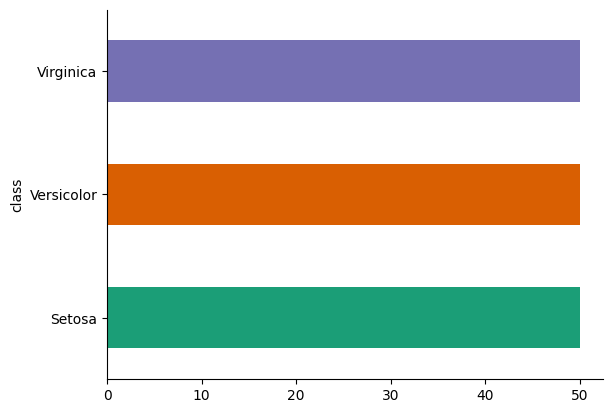

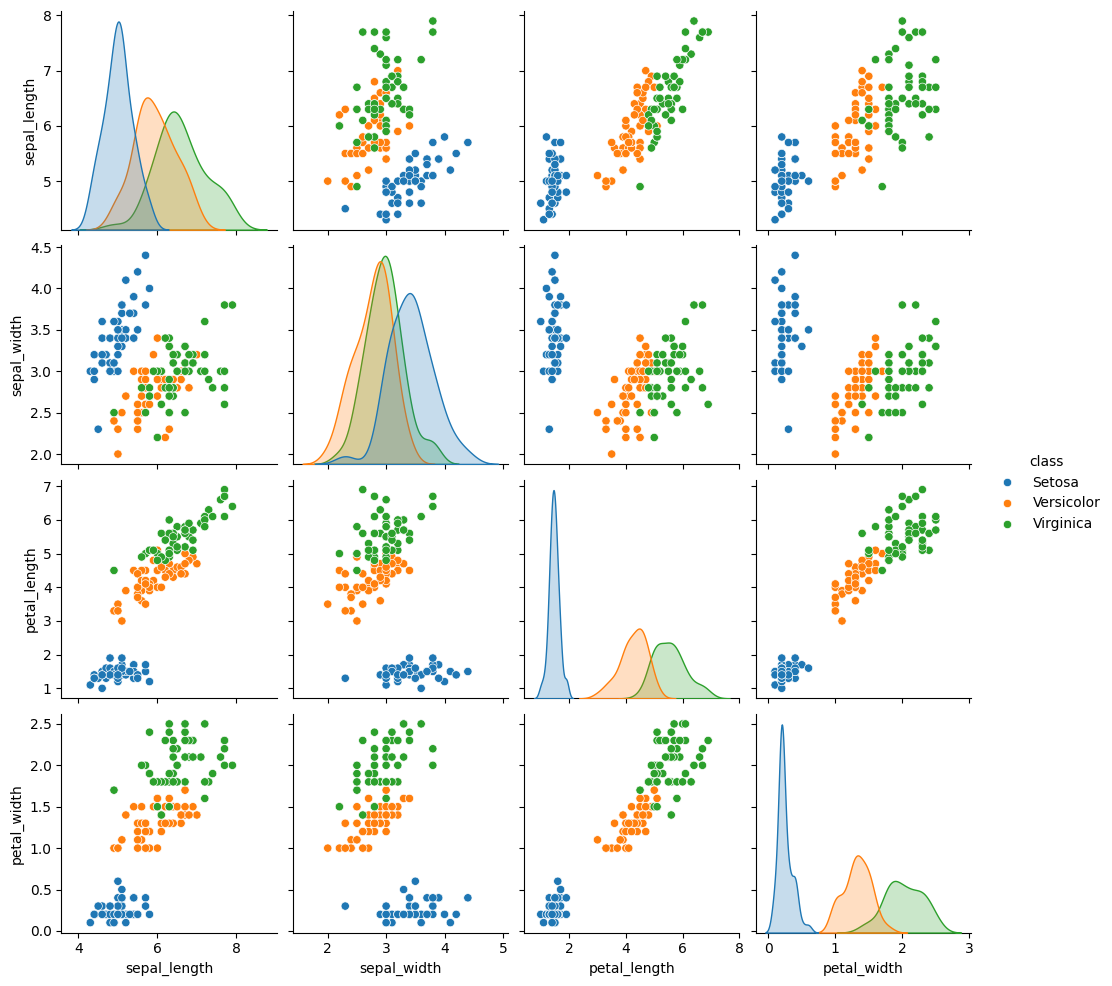

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
sns.pairplot(data, hue='class')

The Dataset is not very large, it contains an equal number of samples from each class. It is clear from the above plots that the Iris class "Setosa" is very well separated from the two other classes. In addition, it seems that petal_length and petal_width are the most significant features.

# Preparing Data
1- Putting data into an array and separating features from class

In [6]:
array = data.values
array[:10]

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa']], dtype=object)

In [7]:
# separate array into features and class
X = array[:,0:4]
Y = array[:,4]

Getting more insight on the important features for a possible selection if needed.

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
print(fit.scores_)

[ 10.81782088   3.7107283  116.31261309  67.0483602 ]


In [9]:
names[:-1]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

As the plots suggest the most important features are "petal length" and "petal width". Maybe "sepal_length" is also at a lower level. "sepal width" feature could probably be dropped.

# Preparing Data
2- Splitting the dataset to "Training dataset" and "Test dataset" (20% dataset). The "Test dataset" is put aside to provide evaluation of a final model fit on the training dataset.A cross validation dataset is also imlemented.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [11]:
# Evaluate using a train and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Splitting further to use cross validation set
#X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [12]:
X_train.shape

(120, 4)

In [13]:
X_test.shape

(30, 4)

# DecisionTree Classifier
We use Grid_Search to select the best parameters.

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4, 5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5]},
             verbose=1)

In [15]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [17]:
%%time
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
model1 = grid_search_cv.best_estimator_ #DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
predicted = cross_val_predict(model1, X_train, Y_train, cv=kfold)

CPU times: user 33.3 ms, sys: 0 ns, total: 33.3 ms
Wall time: 62.8 ms


In [18]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model1, X_train, Y_train, scoring="accuracy", cv=3)
scores

array([1.  , 0.9 , 0.95])

In [19]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.04


In [20]:
from sklearn.metrics import accuracy_score
model1.fit(X_train, Y_train)
Y_prediction = model1.predict(X_test)
score = accuracy_score(Y_test, Y_prediction)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.04


In [21]:
scores=cross_val_score(model1, X_test, Y_test,scoring='f1_macro', cv=3)
scores

array([0.58571429, 0.9047619 , 1.        ])

In [22]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [23]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,Y_prediction)
print(matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(0.5, 23.52222222222222, 'Predicted label')

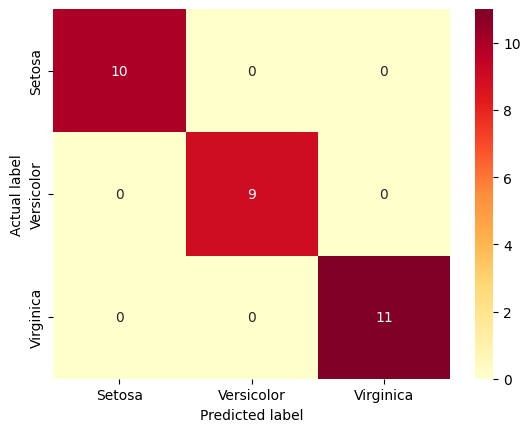

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix)
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="g",ax=ax)
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica']);
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica']);
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')

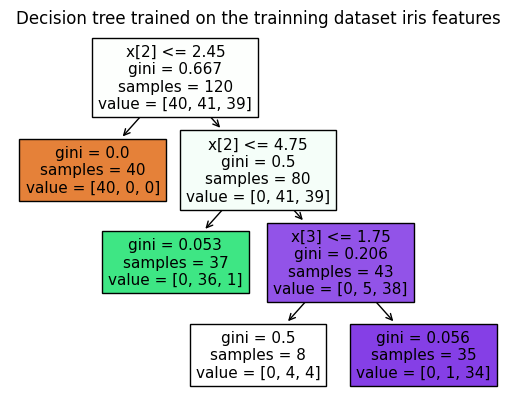

In [25]:
plt.figure()
clf_t = model1.fit(X_train, Y_train)
plot_tree(clf_t, filled=True)
plt.title("Decision tree trained on the trainning dataset iris features")
plt.show()

In [26]:
from sklearn.metrics import log_loss
model1_probs = model1.predict_proba(X_test)
score = log_loss(Y_test, model1_probs)
score

0.041040062655688166

# RandomForest Classifier
We use random forest classifier to select the best parameters.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': list(range(10, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=5)
grid_search_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39, ...]},
             verbose=1)

In [28]:
grid_search_cv.best_estimator_

RandomForestClassifier(n_estimators=14, random_state=42)

In [29]:
%%time
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
#clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
clf=grid_search_cv.best_estimator_
scores = cross_val_score(clf, X_train, Y_train, cv=5)
scores.mean()

CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 125 ms


0.9583333333333334

In [30]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf, X_train, Y_train, scoring="accuracy", cv=3)
scores

array([0.975, 0.925, 0.975])

In [31]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.02


In [32]:
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=14, random_state=42)

In [33]:
Y_prediction = clf.predict(X_test)
#accuracy_score(Y_test, Y_prediction)
score = accuracy_score(Y_test, Y_prediction)
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.02


In [34]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 23.52222222222222, 'Predicted label')

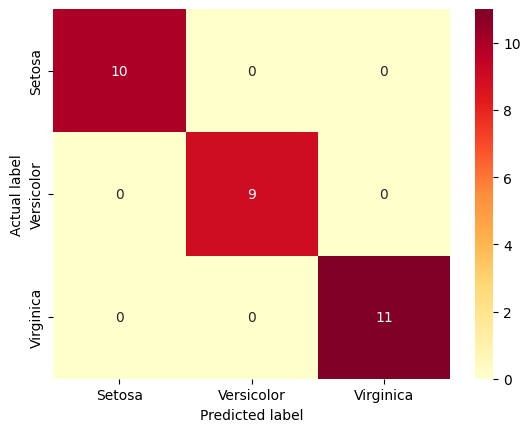

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
#
df_cm = pd.DataFrame(matrix)
ax= plt.subplot()
sn.heatmap(df_cm, annot=True, cmap="YlOrRd", fmt="g",ax=ax)
ax.xaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica']);
ax.yaxis.set_ticklabels(['Setosa', 'Versicolor','Virginica']);
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')

In [36]:
model2_probs = clf.predict_proba(X_test)
score = log_loss(Y_test, model2_probs)
score

0.03109688940253113

# Neural Network Built

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout

# Data Preparation
3 - Convert classes from string to int32 and vector to matrices

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(Y)
le.transform(Y)
le.transform(Y_test)
le.transform(Y_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

Convert class vector to class matrices

In [39]:
Xtrain=np.asarray(X_train).astype(np.float32)
Ytrain=np.asarray(le.transform(Y_train)).astype(np.int32)
Xtest=np.asarray(X_test).astype(np.float32)
Ytest=np.asarray(le.transform(Y_test)).astype(np.int32)

Checking data and shape

In [40]:
Ytrain

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int32)

In [41]:
Xtrain.shape

(120, 4)

# Building a simple model

In [42]:
model = Sequential([
  Dense(64,input_shape = (4, )),
  Activation('relu'),
  Dense(32),
  Activation('relu'),
  Dense(32),
  Activation('relu'),
  Dense(10),
  Activation('softmax')])

Summary of the model

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                3

# Compilation and Fit

In [44]:
# the compilation step
model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
                  )

In [45]:
# fit the model
#%%time
#model.fit(Xtrain, Ytrain, epochs=100, batch_size=128, verbose=1, validation_split=0.1)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.5826 - accuracy: 0.0000e+00 - val_loss: 2.5784 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 2.4334 - accuracy: 0.0000e+00 - val_loss: 2.4347 - val_accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 2.2985 - accuracy: 0.3519 - val_loss: 2.3015 - val_accuracy: 0.1667
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 2.1750 - accuracy: 0.3519 - val_loss: 2.1765 - val_accuracy: 0.1667
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 2.0602 - accuracy: 0.3519 - val_loss: 2.0623 - val_accuracy: 0.1667
Epoch 6/100
1/1 [==============================] - 0s 44ms/step - loss: 1.9549 - accuracy: 0.3519 - val_loss: 1.9600 - val_accuracy: 0.1667
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 1.8609 - accuracy: 0.3519 - val_loss: 1.8651 - val_accuracy: 0.1667
Epoch 8/10

<Axes: >

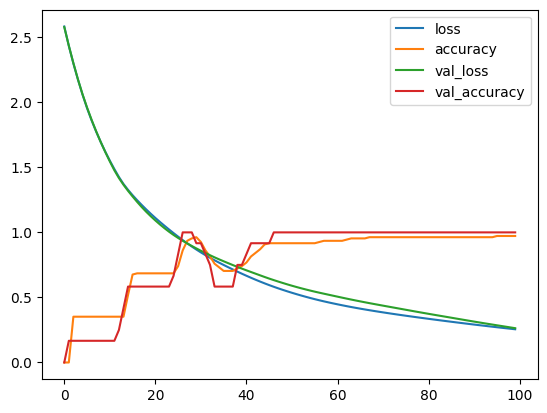

In [46]:
history_callback = model.fit(Xtrain, Ytrain, epochs=100, batch_size=128, verbose=1,validation_split=0.1)
pd.DataFrame(history_callback.history).plot()

In [47]:
test_loss, test_acc = model.evaluate(Xtest, Ytest, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.2636360824108124
Test accuracy: 1.0


# Discussion
The 3 different model are able to fit the data quiet perfecly which may be a symptom of over fiting. Howevr from the low "Loss" parameter it does not seem to be the case. In term of overall model accuracy the neural network model achieve a 0.9722 accuracy on the training set with a loss of 0.2 while the Decision Tree and Random Forest barely achieve 0.96 accuracy but with a loss parameter lower than 0.05. It may probably usufull to further tune models with the use of rescalled features and may be dropping out one feature.
Models had to be fine tuned and seem to be more complex than needed for such a classification data. They are not doing better in classification for the Iris flowers datatset than Logostic Regression.